### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.


In [1]:
import pandas as pd
import numpy as np

In [2]:
banks = pd.read_csv("bank-full.csv", sep=";")

In [3]:
banks.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banks.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [5]:
# select
mycols = ['age', 'job', 'marital', 'education', 'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
dt = banks[mycols].copy()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [6]:
# any missing values
dt.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary` (23202)
- `tertiary`


In [7]:
dt.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous` (biggest: 0.45)

**Tip from FAQ**: color heatmap to quickly identify top correlated ones.

In [8]:
dt.select_dtypes(include=np.number).corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.


In [9]:
# binarize y in an elegant way 
# use LabelBinarizer for one-vs-all
dt.y = (dt.y == 'yes').astype(int)
dt.head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0


In [10]:
# just check how much class imbalance is
dt.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.


In [11]:
from sklearn.model_selection import train_test_split
X = dt.drop("y", axis=1)
y = dt.y
# let us hope the we get enough of positive examples
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [12]:
# check imbalance in val set
y_val.value_counts()

y
0    7972
1    1070
Name: count, dtype: int64

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome` (this is largest)


### Mutual information score

The Mutual Information is a measure of the similarity between two labels of the same data.

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mutual_info_score.html

In [13]:
from sklearn.metrics import mutual_info_score

In [14]:
# dummy mutual info example
feature = ["technician", "entrepreneur", "self-employed", "technician", "housemaid"]
label = [0,1,1,0,0]
mutual_info_score(feature, label)

np.float64(0.6730116670092563)

In [15]:
# group columns by type
# SO: https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
dt.columns.to_series().groupby(dt.dtypes).groups

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y'], object: ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']}

In [16]:
categorical =  ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [17]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = X_train[categorical].apply(calculate_mi) #none are categorical
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi.MI.round(2)

poutcome     0.03
month        0.03
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
Name: MI, dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer #to process categorical and numerical differently

check out: https://stackoverflow.com/a/48673850 

In [64]:
def make_clf_pipe(categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']):
    # define preprocessor
    categorical_transformer = OneHotEncoder(handle_unknown='error', drop='first')

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)],
        remainder="passthrough")

    # choose classifier model
    clf = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

    # full pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', clf)])

    return pipe

In [65]:
model = make_clf_pipe()
model.fit(X_train, y_train)

/home/svetlana/.pyenv/versions/3.12.0/envs/probabl/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [66]:
original_accuracy = model.score(X_val, y_val)
original_accuracy

0.900575094005751

not bad!

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest (absolute) difference?

- `age` - 0.0
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.


In [67]:
for feature in ['age', 'balance', 'marital', 'previous']: #
    print(feature)
    # drop the feature
    print("dropping feature")
    X_train_drop = X_train.drop(feature, axis=1).copy()
    X_val_drop = X_val.drop(feature, axis=1).copy()
    # be sure to drop the feature from "categorical"
    # alternatively change the function above to be dependent on X df
    categorical_features = categorical.copy()
    if feature in categorical:
        categorical_features.remove(feature)
    # retrain model
    mdl = make_clf_pipe(categorical_features)
    print("fitting")
    mdl.fit(X_train_drop, y_train)
    print(mdl.named_steps.classifier.intercept_[0])
    print("evaluating")
    drop_accuracy = mdl.score(X_val_drop, y_val)
    print(f'{feature}: {original_accuracy} - {drop_accuracy} = {original_accuracy - drop_accuracy}')


age
dropping feature
fitting
-1.7172649370961657
evaluating
age: 0.900575094005751 - 0.9002433090024331 = 0.00033178500331787486
balance
dropping feature
fitting
-2.4155205068660996
evaluating
balance: 0.900575094005751 - 0.9006856890068569 = -0.00011059500110588427
marital
dropping feature
fitting
-1.537970509298784
evaluating
marital: 0.900575094005751 - 0.8992479539924796 = 0.0013271400132713884
previous
dropping feature
fitting
-1.8289681264108275
evaluating
previous: 0.900575094005751 - 0.900353904003539 = 0.0002211900022119906


Note: "age" is incorrect, as well as "previous" and "marital". Should it be "balance" then?

Another thing is, am I missing any transformation of features?

Note 1: changing handle_unknown from "ignore" to "error" :
- solved the problem with exact same accuracy in "age"
- nevertheless, the answer is still "age"

Note 2: changing from drop=None to "first"
 - now the answer is "balance" - so it is probably correct!

In [29]:
# q. in slack: why exact same accuracy without "age"??
original_accuracy

0.9009068790090687

In [37]:
# coefficients original model
orig_coef = model.named_steps.classifier.coef_[0]
print(len(orig_coef))
orig_coef

47


array([ 9.41260965e-02, -2.11096468e-01, -2.62803544e-01, -3.72247081e-01,
       -8.35217248e-02,  2.26919875e-01, -2.89279597e-01, -1.13340172e-01,
        3.17257729e-01, -1.41235449e-01,  5.16970574e-02, -2.26641681e-01,
       -3.45681271e-01, -4.90633883e-01, -1.73849804e-01, -4.43052311e-01,
       -2.48936620e-01, -6.62749039e-02, -2.51901123e-01, -1.54476465e-01,
       -8.55688494e-01,  2.61584615e-01,  5.99825237e-02, -1.33173210e+00,
       -1.14373640e-02, -7.26438404e-01,  4.66714735e-01, -3.26073208e-01,
       -1.30097933e+00, -1.04467758e+00,  3.10344999e-01,  1.53979819e+00,
       -5.10088703e-01, -9.86660904e-01,  7.61071470e-01,  8.18261136e-01,
       -8.22948215e-01, -6.27934909e-01,  1.47521464e+00, -1.03449648e+00,
        1.01028864e-03,  1.03848096e-05,  9.99346359e-03,  4.14614152e-03,
       -8.14955566e-02, -5.45439164e-04,  8.10194874e-03])

In [41]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [38]:
# drop age
feat = "age"
X_train_drop = X_train.drop(feat, axis=1).copy()
X_val_drop = X_val.drop(feat, axis=1).copy()
mdl = make_clf_pipe(categorical_features)
mdl.fit(X_train_drop, y_train)
drop_accuracy = mdl.score(X_val_drop, y_val)
print(f'{feat}: {original_accuracy} - {drop_accuracy} = {original_accuracy - drop_accuracy}')
drop_coef = mdl.named_steps.classifier.coef_[0]
print(len(drop_coef))
drop_coef


age: 0.9009068790090687 - 0.9009068790090687 = 0.0
46


array([ 8.69379540e-02, -2.11173894e-01, -2.72886638e-01, -3.48673751e-01,
       -8.43841306e-02,  2.55919677e-01, -2.99813120e-01, -1.26833331e-01,
        3.18459466e-01, -1.53813256e-01,  3.11076972e-02, -1.83255602e-01,
       -3.33419738e-01, -4.77395006e-01, -1.77594184e-01, -4.27350353e-01,
       -2.54618400e-01, -6.22981071e-02, -2.44142068e-01, -1.46930552e-01,
       -8.41478375e-01,  2.53924975e-01,  7.62634695e-02, -1.31859737e+00,
       -9.19819634e-03, -7.30547151e-01,  3.88020239e-01, -3.34393856e-01,
       -1.18806623e+00, -1.03654058e+00,  3.27024473e-01,  1.47420679e+00,
       -4.96551641e-01, -9.79069893e-01,  7.94764648e-01,  8.01942471e-01,
       -8.05496752e-01, -6.22776024e-01,  1.47087835e+00, -1.03101450e+00,
        1.08426419e-05,  9.50025747e-03,  4.13933876e-03, -7.94797364e-02,
       -5.52678282e-04,  8.13639141e-03])

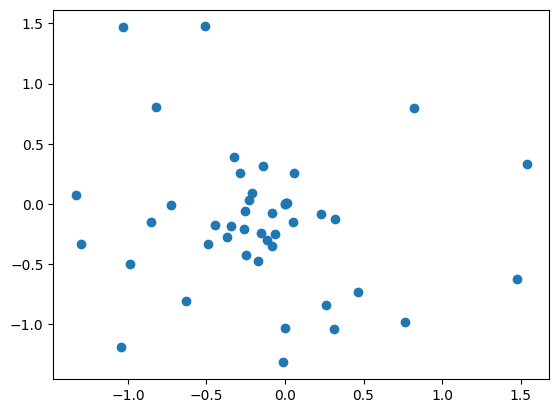

In [44]:
# coefficients are definitely different!
from matplotlib import pyplot as plt
plt.scatter(orig_coef[1:], drop_coef);

In [52]:
# check _permutation_ feature importance?
from sklearn.inspection import permutation_importance
orig_imp = permutation_importance(model, X_val, y_val)
drop_imp = permutation_importance(mdl, X_val_drop, y_val)
orig_imp

{'importances_mean': array([ 2.87547003e-04,  2.65428003e-04,  1.54833002e-04,  4.86618005e-04,
        -1.54833002e-04,  1.65892502e-03,  5.17584605e-03, -4.42380004e-05,
         2.63216103e-03,  3.34660473e-02,  2.43309002e-04, -1.10595001e-04,
         1.54833002e-04,  1.13028091e-02]),
 'importances_std': array([0.00013271, 0.00020512, 0.00047748, 0.00049755, 0.00021672,
        0.00057679, 0.00102418, 0.00015002, 0.00062327, 0.00173546,
        0.00019027, 0.00032053, 0.0001797 , 0.00112872]),
 'importances': array([[ 0.00055298,  0.00022119,  0.00022119,  0.00022119,  0.00022119],
        [ 0.00055298,  0.00022119,  0.00044238,  0.        ,  0.0001106 ],
        [ 0.00077417,  0.00066357, -0.0001106 , -0.00044238, -0.0001106 ],
        [ 0.00132714,  0.0001106 ,  0.00022119,  0.        ,  0.00077417],
        [-0.00022119,  0.00022119, -0.00044238, -0.00022119, -0.0001106 ],
        [ 0.00243309,  0.00143774,  0.00088476,  0.0022119 ,  0.00132714],
        [ 0.00475559,  0.00608

In [53]:
drop_imp

{'importances_mean': array([ 1.54833002e-04,  4.42380004e-04, -1.10595001e-04, -1.32714001e-04,
         9.28998009e-04,  4.82194205e-03,  4.20261004e-04,  1.72528202e-03,
         3.38641893e-02,  3.09666003e-04, -1.54833002e-04, -8.84760009e-05,
         1.07719531e-02]),
 'importances_std': array([7.01559457e-04, 5.09217626e-04, 6.88892347e-04, 1.08360528e-04,
        5.35444302e-04, 5.39993613e-04, 3.08082023e-04, 1.05292017e-03,
        1.35161390e-03, 5.01472420e-04, 3.25081585e-04, 8.27617206e-05,
        8.86417382e-04]),
 'importances': array([[ 0.00044238,  0.00077417,  0.00044238, -0.00121655,  0.00033179],
        [ 0.00099536,  0.        , -0.0001106 ,  0.00022119,  0.00110595],
        [ 0.00110595,  0.        , -0.00077417, -0.00077417, -0.0001106 ],
        [-0.0001106 , -0.00033179, -0.0001106 , -0.0001106 ,  0.        ],
        [ 0.00176952,  0.00132714,  0.00055298,  0.00066357,  0.00033179],
        [ 0.00387083,  0.00464499,  0.00519797,  0.00497678,  0.00541916],

Accuracies on test set are not identical:

In [48]:
# and what about evaluating on test dataset?
model.score(X_test, y_test)

0.8991485126617274

In [49]:
mdl.score(X_test.drop("age", axis = 1), y_test)

0.8989273471193188

Accuracies on validation set do not differ:

In [50]:
model.score(X_val, y_val)

0.9009068790090687

In [51]:
mdl.score(X_val.drop("age", axis = 1), y_val)

0.9009068790090687

In [47]:
# what if we regularize less?
# use function from below 
mdl1 = make_clf_pipe_cv(C=0.01)
mdl1.fit(X_train, y_train)
mdl1.score(X_val, y_val)

0.8981420039814201

In [56]:
mdl2 = make_clf_pipe_cv(C=0.01)
mdl2.fit(X_train_drop, y_train)
mdl2.score(X_val_drop, y_val)

0.8985843839858438

In [57]:
# different seed
# let us hope the we get enough of positive examples
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=0)
mdl3 = make_clf_pipe()
mdl3.fit(X_train, y_train)
mdl3.score(X_val, y_val)


0.8996903339969033

In [59]:
mdl4 = make_clf_pipe()
mdl4.fit(X_train.drop("age",axis=1), y_train)
mdl4.score(X_val.drop("age",axis=1), y_val)

0.9002433090024331

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0, 0.01, 0.1, 1, 10]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.


About C:

"C float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization."

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# check how params are called
make_clf_pipe().get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['job', 'marital', 'education', 'housing',
                                     'contact', 'month', 'poutcome'])])),
  ('classifier',
   LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['job', 'marital', 'education', 'housing',
                                   'contact', 'month', 'poutcome'])]),
 'classifier': LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
 'preprocessor__force_int_remainder_cols': True,
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'passthrough',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__trans

In [25]:
# Grid search CV
pipe = make_clf_pipe()
parameters = {'classifier__C':[0.01, 0.1, 1, 10, 100]}
gridsearch = GridSearchCV(pipe, parameters)
gridsearch.fit(X_train_full, y_train_full) #containts train and validation set


/home/svetlana/.pyenv/versions/3.12.0/envs/probabl/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'housing',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]})

In [26]:
gridsearch.cv_results_

{'mean_fit_time': array([0.35728941, 0.49960938, 0.42836809, 0.41571889, 0.37728782]),
 'std_fit_time': array([0.02842665, 0.25257321, 0.03004259, 0.05716202, 0.02795162]),
 'mean_score_time': array([0.01772747, 0.01771336, 0.01763544, 0.01757908, 0.01629853]),
 'std_score_time': array([0.00040049, 0.00134838, 0.00177577, 0.00069605, 0.00034476]),
 'param_classifier__C': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'classifier__C': 0.01},
  {'classifier__C': 0.1},
  {'classifier__C': 1},
  {'classifier__C': 10},
  {'classifier__C': 100}],
 'split0_test_score': array([0.89632292, 0.89811999, 0.89950235, 0.8985347 , 0.89922588]),
 'split1_test_score': array([0.89770528, 0.89950235, 0.90047   , 0.90212884, 0.90033177]),
 'split2_test_score': array([0.90240531, 0.90295825, 0.90295825, 0.90254354, 0.90282002]),
 'split3_test_score': array([0.9005945 , 0.90239182, 0.90266833, 0.90280658, 0.902

We got C=10 for best estimator.

In [27]:
# do it now by hand
# redo function for CV without C

def make_clf_pipe_cv(categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
                     , C=1.0):
    # define preprocessor
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)],
        remainder="passthrough")

    # choose classifier model
    clf = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)

    # full pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', clf)])

    return pipe

In [28]:
for C in [0.01,0.1,1,10,100]:
    pipe = make_clf_pipe_cv(C=C)
    pipe.fit(X_train, y_train)
    print(f'C={C}, accuracy {round(pipe.score(X_val, y_val),3)}')

C=0.01, accuracy 0.898
C=0.1, accuracy 0.901
C=1, accuracy 0.901
C=10, accuracy 0.901
C=100, accuracy 0.901


With rounding C=0.1 looks OK.